##  Sentiment Analysis using NLTK

In [1]:
import nltk

nltk.download([
     "names",
     "stopwords",
     "state_union",
    "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
 ])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\rlong\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rlong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\rlong\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\rlong\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\rlong\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rlong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up

True

In [2]:
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]


In [3]:
stopwords = nltk.corpus.stopwords.words("english")


In [4]:
words = [w for w in words if w.lower() not in stopwords]


In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
>>> sia = SentimentIntensityAnalyzer()
>>> sia.polarity_scores("Wow, NLTK is really powerful!")


{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [6]:
tweets = [t.replace("://", "//") for t in nltk.corpus.twitter_samples.strings()]


In [7]:
from random import shuffle

def is_positive(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia.polarity_scores(tweet)["compound"] > 0

shuffle(tweets)
for tweet in tweets[:10]:
    print(">", is_positive(tweet), tweet)


> False RT @craigreid1987: Sturgeon disnae have a clue! Her government has failed Scotland in the last 8 years! #Snpout
> True i've been friends with steph and mel for the longest time im actually so sad i havent met them yet :(( i just want to hug them
> False @john_finneless @eleanoraus Look, they took the "prettiest" pictures XDD https//t.co/WnJLhcLF7E
> False RT @TeddyUKIPClark: @UKIP @andyolsenukip a consequence of nasty vindictive #EUSSR #BBCEUSSR bias
> True I always tell myself to not take that nap because I won't be able to sleep at night but like I always take that nap :-)
> False RT @Plaid_Cymru: .@LeanneWood: Ruling out a deal with SNP was irresponsible of Miliband. I thought he wanted to stop the Tories. #Plaid15
> False RT @NorseFired: #AskNigelFarage If #UKIP are "not racist", why did you ally with Neo-Nazis and Holocaust Deniers in the Euro Parliament?
> False RT @___BJA: Jo Coburn is a nob. Farage makes sensible suggestion, she interrupts then makes snide comment as sh

In [8]:
positive_review_ids = nltk.corpus.movie_reviews.fileids(categories=["pos"])
negative_review_ids = nltk.corpus.movie_reviews.fileids(categories=["neg"])
all_review_ids = positive_review_ids + negative_review_ids


In [9]:
from statistics import mean

def is_positive(review_id: str) -> bool:
    """True if the average of all sentence compound scores is positive."""
    text = nltk.corpus.movie_reviews.raw(review_id)
    scores = [
        sia.polarity_scores(sentence)["compound"]
        for sentence in nltk.sent_tokenize(text)
    ]
    return mean(scores) > 0


In [10]:
shuffle(all_review_ids)
>>> correct = 0
>>> for review_id in all_review_ids:
...     if is_positive(review_id):
...         if review_id in positive_review_ids:
...             correct += 1
...     else:
...         if review_id in negative_review_ids:
...             correct += 1
...
>>> print(F"{correct / len(all_review_ids):.2%} correct")

64.05% correct


In [11]:
unwanted = nltk.corpus.stopwords.words("english")

unwanted.extend([w.lower() for w in nltk.corpus.names.words()])


def skip_unwanted(pos_tuple):

    word, tag = pos_tuple

    if not word.isalpha() or word in unwanted:

        return False

    if tag.startswith("NN"):

        return False

    return True


positive_words = [word for word, tag in filter(

    skip_unwanted,

    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["pos"]))

)]

negative_words = [word for word, tag in filter(

    skip_unwanted,

    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["neg"]))

)]

In [12]:
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)

common_set = set(positive_fd).intersection(negative_fd)

for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

top_100_positive = {word for word, count in positive_fd.most_common(100)}
top_100_negative = {word for word, count in negative_fd.most_common(100)}


In [13]:
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

positive_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    w for w in nltk.corpus.movie_reviews.words(categories=["pos"])
    if w.isalpha() and w not in unwanted
])
negative_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    w for w in nltk.corpus.movie_reviews.words(categories=["neg"])
    if w.isalpha() and w not in unwanted
])


In [14]:
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [15]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}


In [16]:
def extract_features(text):
    features = dict()
    wordcount = 0
    compound_scores = list()
    positive_scores = list()

    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in top_100_positive:
                wordcount += 1
        compound_scores.append(sia.polarity_scores(sentence)["compound"])
        positive_scores.append(sia.polarity_scores(sentence)["pos"])

    # Adding 1 to the final compound score to always have positive numbers
    # since some classifiers you'll use later don't work with negative numbers.
    features["mean_compound"] = mean(compound_scores) + 1
    features["mean_positive"] = mean(positive_scores)
    features["wordcount"] = wordcount

    return features


In [17]:
features = [
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "pos")
    for review in nltk.corpus.movie_reviews.fileids(categories=["pos"])
]
features.extend([
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "neg")
    for review in nltk.corpus.movie_reviews.fileids(categories=["neg"])
])


In [18]:
# Use 1/4 of the set for training
train_count = len(features) // 2
shuffle(features)
classifier = nltk.NaiveBayesClassifier.train(features[:train_count])
classifier.show_most_informative_features(10)

nltk.classify.accuracy(classifier, features[train_count:])

Most Informative Features
               wordcount = 3                 pos : neg    =      7.8 : 1.0
               wordcount = 4                 pos : neg    =      4.0 : 1.0
               wordcount = 2                 pos : neg    =      3.7 : 1.0
               wordcount = 1                 pos : neg    =      1.9 : 1.0
               wordcount = 0                 neg : pos    =      1.8 : 1.0
           mean_positive = 0.06466666666666666    pos : neg    =      1.0 : 1.0
           mean_positive = 0.08377142857142857    pos : neg    =      1.0 : 1.0
           mean_positive = 0.123             pos : neg    =      1.0 : 1.0
           mean_positive = 0.1245            pos : neg    =      1.0 : 1.0
           mean_positive = 0.126375          pos : neg    =      1.0 : 1.0


0.645

In [33]:
>>> # Use 1/4 of the set for training
train_count = len(features) // 2
shuffle(features)
for name, sklearn_classifier in classifiers.items():
    classifier = nltk.classify.SklearnClassifier(sklearn_classifier)
    classifier.train(features[:train_count])
    accuracy = nltk.classify.accuracy(classifier, features[train_count:])
    print(F"{accuracy:.2%} - {name}")

65.20% - BernoulliNB
65.20% - ComplementNB
65.20% - MultinomialNB
70.50% - KNeighborsClassifier
64.90% - DecisionTreeClassifier
68.20% - RandomForestClassifier
71.80% - LogisticRegression
72.00% - MLPClassifier
70.20% - AdaBoostClassifier


In [61]:
import pandas as pd

data={'Name':['BernoulliNB','ComplementNB','MultinomialNB','KNeighbors','DecisionTree',
              'RandomForest','LogisticRegres','MLPClass','AdaBoost'],'Score':[65.2, 65.2, 65.2, 70.5 ,64.9, 68.2, 71.8, 72, 70.2]}

df=pd.DataFrame(data)
df

,Name,Score
0,BernoulliNB,65.2
1,ComplementNB,65.2
2,MultinomialNB,65.2
3,KNeighbors,70.5
4,DecisionTree,64.9
5,RandomForest,68.2
6,LogisticRegres,71.8
7,MLPClass,72.0
8,AdaBoost,70.2


In [62]:
df.sort_values(by=['Score'], ascending=False)

,Name,Score
7,MLPClass,72.0
6,LogisticRegres,71.8
3,KNeighbors,70.5
8,AdaBoost,70.2
5,RandomForest,68.2
0,BernoulliNB,65.2
1,ComplementNB,65.2
2,MultinomialNB,65.2
4,DecisionTree,64.9


Text(0.5, 1.0, 'Sentiment Analysis Accuracy Scores')

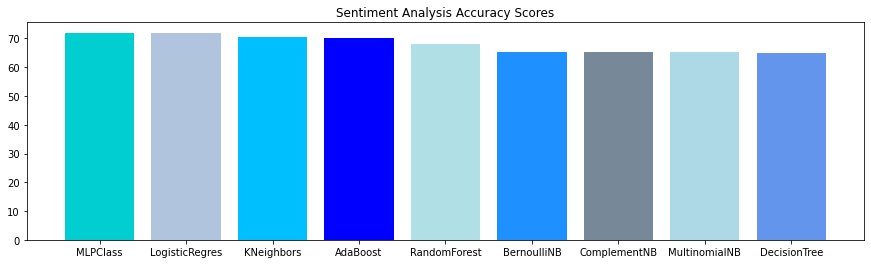

In [72]:
plt.figure(figsize = (15, 4))
df1 = df.sort_values(by=['Score'], ascending=False)
plt.bar(df1['Name'], df1['Score'], color = ['darkturquoise', 'lightsteelblue', 'deepskyblue', 'blue', 'powderblue' ,'dodgerblue', 'lightslategrey', 'lightblue', 'cornflowerblue'])
plt.title ('Sentiment Analysis Accuracy Scores')

#### Mogyorosi, M. (2020)  Sentiment Analysis: First Steps With Python's NLTK Library.  https://realpython.com/python-nltk-sentiment-analysis/#selecting-useful-features (accessed on 14 November 2022)